In [ ]:
# !pip install kiwipiepy

In [463]:
import pandas as pd
import numpy as np
import cv2
import glob

import statistics
import re
import nltk

from sklearn.feature_extraction.text import CountVectorizer # bow of document

from wordcloud import WordCloud

import kiwipiepy
from kiwipiepy import Kiwi # 형태소 분석
from kiwipiepy.utils import Stopwords # kiwi 불용어

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings
warnings.filterwarnings('ignore')

In [52]:
def Rep_text(text): # 단어 통일 시키기
    text = str(text)
    pattern = '(\n){1,}' 
    text = re.sub(pattern=pattern, repl='\n', string=text) # \n가 1번이상 사용된 경우 \n로 바꾸기
    return text

# data load

In [212]:
df = pd.read_csv('../data/pre_data.csv')

In [213]:
df['preprocessed_best_comment'] = df['preprocessed_best_comment'].apply(lambda x: Rep_text(x)) # \n 반복되는 것 제거
df['preprocessed_comment'] = df['preprocessed_comment'].apply(lambda x: Rep_text(x)) # \n 반복되는 것 제거

# stopword 단어 추가하기

In [299]:
au_lst=[]
for a in list(df['author'].unique()): # #을 기준으로 작가 컬럼에 들어간 작가들 나누기
    au = a.split('#')[1:] # 0번째는 필요없으므로 제외
    for i in au: # 작가 리스트에 추가하기
        au_lst.append(i)
        
au_lst = list(set(au_lst)) # 작가 중복 제외

In [300]:
# stopword
file_path = 'stopwords.txt'  # 경로 지정
with open(file_path, 'r', encoding='utf-8') as file:
    word = file.read()

word = word.split('\n') # \n 구분
# stopword 추가하기
word_lst = ['가서', '같은', '것과', '결과에', '결론을', '관계가', '관련이', '그런', '그럼에도', 
            '그렇게', '그에', '그치지', '김에', '까닭에', '낫다', '년도', '논하지', '누가', '다시', 
            '달려', '대로', '대해', '되는', '되다', '되어', '들면', '들자면', '듯하다', '따르는', 
            '따름이다', '따지지', '때가', '만은', '만이', '많은', '말하면', '말할것도', '몰라도', 
            '몰랏다', '못하다', '미치다', '바꾸어서', '바꿔', '밖에', '방면으로', '보면', '보아', 
            '부류의', '비길수', '비추어', '뿐만', '사람들', '상대적으로', '생각이다', '서술한바와같이', 
            '쓰여', '아니다', '아니라', '안다', '안된다', '않고', '않기', '않는다면', '않다', '않다면', 
            '않도록', '않으면', '알겠는가', '어쩔수', '없고', '없다', '예를', '외에', '요만한', '우에', 
            '위에서', '이렇게', '이로', '이르다', '이와', '이유는', '인하여', '임에', '점에서', '정도에', 
            '정도의', '종합한것과같이', '주저하지', '줄은', '지경이다', '틀림없다', '편이', '하고', '하기', 
            '하기만', '하는', '하는것만', '하는것이', '하다', '하면', '하지', '한하다', '할수록', '함으로써', 
            '해도', '해서는', '형식으로', '힘이'] + au_lst

for w in word_lst:
    word.append(w)
stopwords = set(word)

# 장르 빈도
1. 완결에서 인기작의 장르 빈도
2. 연재중에서 인기작의 장르 빈도
3. 연재중 요일 별 인기작의 장르 빈도

In [59]:
finish = df.query('web=="완결"')
serialized = df.query('web=="연재중"')

In [79]:
# wordcloud에서 한글을 사용할 수 있도록 설정하기
font_path = 'C:\\Users\\user\\anaconda3\\envs\\text\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\malgun.ttf'

In [139]:
wc = WordCloud(
    font_path=font_path,
    background_color='white',    # 배경색
    max_words=45,                # 시각화할 단어 개수
    width=400,                   # 가로 크기
    height=300)                  # 세로 크기

### 1.완결에서 인기작의 장르 빈도

In [137]:
genre_lst=[]
for gen in list(finish['genre'].unique()): # #을 기준으로 장르 컬럼에 들어간 장르들 나누기
    g = gen.split('#')[1:] # 0번째는 필요없으므로 제외
    for i in g: # 장르 리스트에 추가하기
        genre_lst.append(i)

In [138]:
# bow of document
cv = CountVectorizer()
dtm = cv.fit_transform(genre_lst)

word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(), # 단어 목록 확인
    '빈도': dtm.sum(axis=0).flat # 단어별 총 빈도
})

# word_count를 사전(dict) 형태로 변환
count_dic = dict(zip(word_count.단어, word_count.빈도))

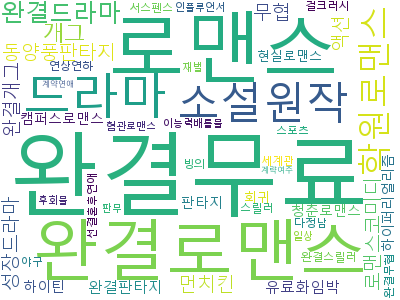

In [144]:
cloud = wc.fit_words(count_dic)
cloud.to_image()
# cloud.to_file('img/finish_webtoon_cloud.png')

### 2.연재중에서 인기작의 장르 빈도

In [148]:
genre_lst=[]
for gen in list(serialized['genre'].unique()): # #을 기준으로 장르 컬럼에 들어간 장르들 나누기
    g = gen.split('#')[1:] # 0번째는 필요없으므로 제외
    for i in g: # 장르 리스트에 추가하기
        genre_lst.append(i)

In [149]:
# bow of document
cv = CountVectorizer()
dtm = cv.fit_transform(genre_lst)

dtm.sum(axis=0) # 딘어별 총 빈도
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(), # 단어 목록 확인
    '빈도': dtm.sum(axis=0).flat
})

# word_count를 사전(dict) 형태로 변환
count_dic = dict(zip(word_count.단어, word_count.빈도))

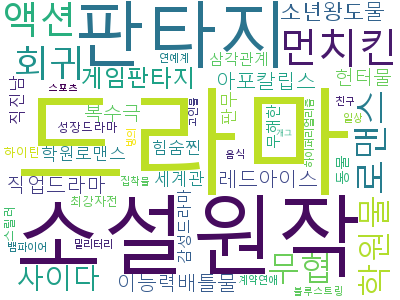

In [150]:
cloud = wc.fit_words(count_dic)
cloud.to_image()
# cloud.to_file('img/serialized_webtoon_cloud.png')

### 3.연재중 요일 별 인기작의 장르 빈도

In [193]:
days = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']

for n, d in enumerate(days):
    genre_lst = []
    for gen in list(serialized.query('day == @d')['genre'].unique()): # #을 기준으로 장르 컬럼에 들어간 장르들 나누기
        g = gen.split('#')[1:] # 0번째는 필요없으므로 제외
        for i in g: # 장르 리스트에 추가하기
            genre_lst.append(i)
            
    # 문서 단어 행렬
    cv = CountVectorizer()
    dtm = cv.fit_transform(genre_lst)
    
    dtm.sum(axis=0) # 딘어별 총 빈도
    word_count = pd.DataFrame({
        '단어': cv.get_feature_names_out(),
        '빈도': dtm.sum(axis=0).flat
    })
    
    # word_count를 사전(dict) 형태로 변환
    count_dic = dict(zip(word_count.단어, word_count.빈도))
    
    cloud = wc.fit_words(count_dic)
    cloud.to_image()
#     cloud.to_file(f'img/{n}_serialized_webtoon_cloud.png')

# 위의 결과 비교

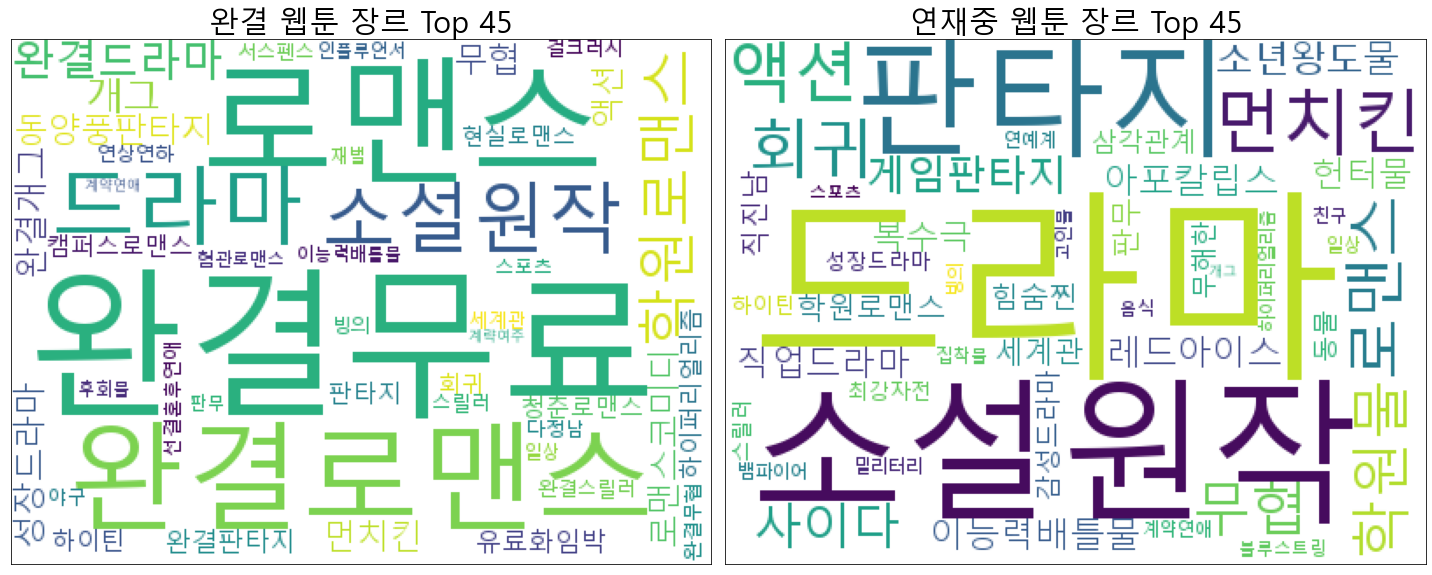

In [172]:
fig = plt.figure(figsize=(20,15))
rows, cols = 1, 2

img1 = cv2.imread('img/finish_webtoon_cloud.png')
img2 = cv2.imread('img/serialized_webtoon_cloud.png')

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('완결 웹툰 장르 Top 45', fontsize=30)
ax1.set_xticks([]), ax1.set_yticks([])
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('연재중 웹툰 장르 Top 45', fontsize=30)
ax2.set_xticks([]), ax2.set_yticks([])
 
plt.tight_layout() # subplot 여백 자동 조정
plt.show()

- 완결에서 연재중에 비해 로맨스 비중과 개그의 비중이 더 많음
- 연재중 웹툰의 경우, 최근 인기있었던 웹툰들에 기반하여 소설원작, 판타지, 회귀의 내용이 많음

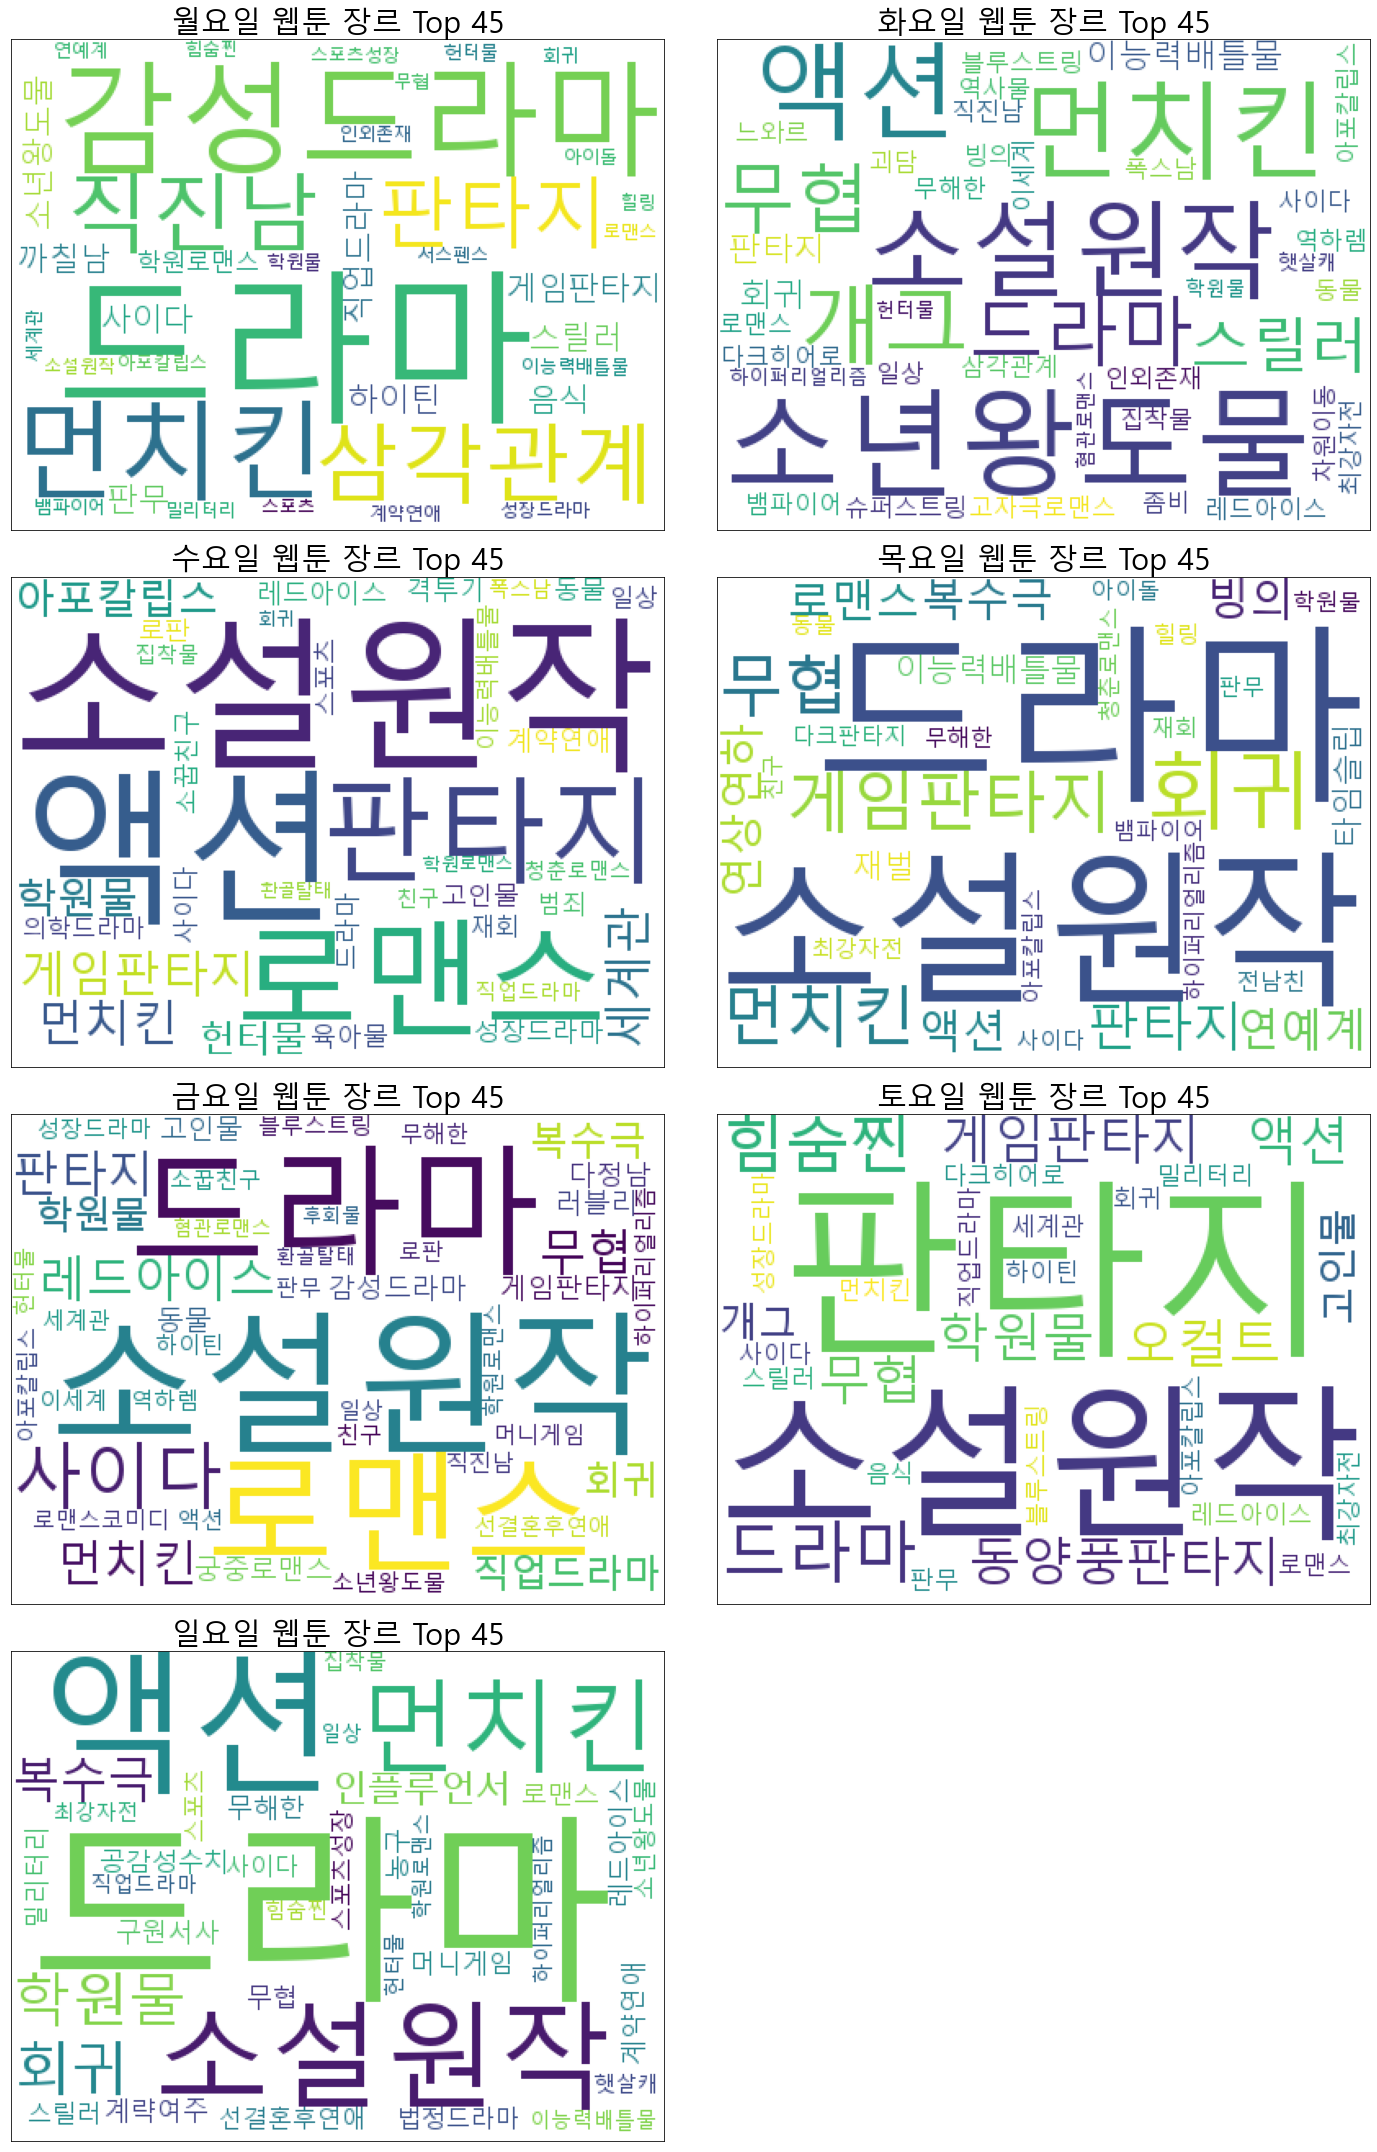

In [211]:
fig = plt.figure(figsize=(20,30)) # rows*cols 행렬의 i번째 subplot 생성
rows, cols, i = 4, 2, 1
 
xlabels = ["xlabel", "월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"]

for filename in glob.glob("img/*.png")[:-2]:
    filename = filename.split('\\')[-1]
    img = cv2.imread('img/'+filename)
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'{xlabels[i]} 웹툰 장르 Top 45', fontsize=30)
    ax.set_xticks([]), ax.set_yticks([])
    i += 1

plt.tight_layout() # subplot 여백 자동 조정
plt.show()

- 월요일은 인기작 중 소설원작 장르가 인기 없음을 확인 가능
- 목요일은 빙의, 회귀물의 비중이 큼
---

# 발단-전개-위기-절정-결말으로 단어 변화

- 발단-전개-위기-절정-결말로 나누기 위해서는 완결 웹툰 중 고르기로 결정
- 웹툰의 흐름을 위해서 드라마 같은 느낌의 웹툰 선정
- 전체 회차의 20%씩 발단,전개,위기,절정,결말 로 부여

In [217]:
finish.groupby('title')[['episode']].count().reset_index().sort_values(by='episode', ascending=False)

# 연놈, 캐슬 선정

,title,episode
11,놓지마 정신줄,717
25,연애혁명,442
24,연놈,372
18,모두에게 완자가,269
23,여신강림,267
15,마녀와 용의 신혼일기,254
13,독립일기,205
14,돌아온 여기사,200
29,이말년씨리즈,159
19,별이삼샵,145


### tokenize & stopword

- kiwi를 이용한 tokenize
- kiwi에서 제공하는 stopword 1차적으로 사용
- 명사 tag에 해당하는 단어 출력

- 위에서 불러온 stopword와 작가이름을 빼준 stopword 리스트를 이용해 한번 더 제거
- 단어 길이가 1개 이상만

In [331]:
kiwi_stop = Stopwords() # kiwi 불용어

kiwi = kiwipiepy.Kiwi()
def extract_noun(text): # kiwi 사용하여 토큰화
    for token in kiwi.tokenize(text, normalize_coda=True, stopwords=kiwi_stop): 
        # normalize_coda 옵션 사용, 덧붙은 받침 때문에 분석이 깨지는 경우 방지
        # stopwords 불용어 관리
        if token.tag in {'NNG', 'NNP'}: # kiwi 명사 추출
            yield token.form
            
# 각 유저의 댓글로 나눠서 명사 추출
def Token(text):
    text = str(text)
    unique_words = []
    for sen in text.split('\n'):
        n_lst = extract_noun(sen)
        unique_words += n_lst
    return unique_words

In [332]:
stopwords = set(list(stopwords)+ ['클린','표현','감지','댓글','작가','웹툰','네이버']) # stopword 단어 추가

# 해당 row의 단어 추출하는 함수
def Flow_word(flow_df, num, col):
    words = list(Token(flow_df[col][num]))
    all_words = []
    for word in words:
        if (word not in stopwords) & (len(word)>1):  # stopwords에 포함되는 단어 제거
            all_words.append(word)
    return all_words

## 연놈

In [218]:
num = 372/5 # 웹툰을 5부분으로 분류

q1 = num
q2 = q1+num
q3 = q2+num
q4 = q3+num
q5 = q4+num
q1,q2,q3,q4,q5 = [int(q1),'발단'],[int(q2),'전개'],[int(q3),'위기'],[int(q4),'절정'],[int(q5),'결말']

In [219]:
first_df = finish.query('title=="연놈"').reset_index().iloc[:,2:]
first = pd.DataFrame(columns=['seq','title','preprocessed_best_comment','preprocessed_comment','sentiment'])

start=0
for i,txt in [q1,q2,q3,q4,q5]: # 각 전체 화수의 20%씩 분할하여 배정
    make_df = first_df.iloc[start:i+1,:]
    seq, title, sentiment = txt, '연놈', statistics.mode(make_df['sentiment']) # 최빈값
    best=''
    com=''
    for j in range(len(make_df)):
        z = make_df['preprocessed_best_comment'].iloc[j]+'\n'
        best += z
        x = make_df['preprocessed_comment'].iloc[j]+'\n'
        com += x
    first.loc[len(first)] = [seq, title, best, com, sentiment]
    start = i+1

In [344]:
wc = WordCloud(
    font_path=font_path, background_color='white',  # 배경색
    max_words=40, width=400, height=300)            # 시각화할 단어 개수, 가로 크기, 세로 크기

#### 발단

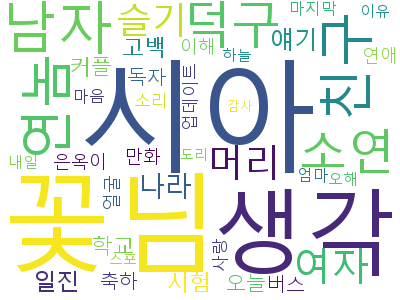

In [345]:
all_words = Flow_word(first, 0, 'preprocessed_best_comment') # 해당하는 단어 리스트 생성

# bow of document
cv = CountVectorizer()
dtm = cv.fit_transform(all_words)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(), # 단어 목록 확인
    '빈도': dtm.sum(axis=0).flat # 딘어별 총 빈도
})
count_dic = dict(zip(word_count.단어, word_count.빈도)) # word_count를 사전(dict) 형태로 변환

cloud = wc.fit_words(count_dic)
cloud.to_image() # 시각화
# cloud.to_file('img/flow/first_web_0.png')

#### 전개

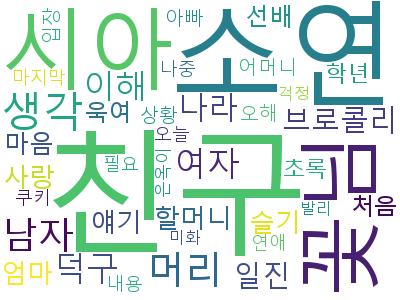

In [347]:
all_words = Flow_word(first, 1, 'preprocessed_best_comment') # 해당하는 단어 리스트 생성

# bow of document
cv = CountVectorizer()
dtm = cv.fit_transform(all_words)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(), # 단어 목록 확인
    '빈도': dtm.sum(axis=0).flat # 단어별 총 빈도
})
count_dic = dict(zip(word_count.단어, word_count.빈도)) # word_count를 사전(dict) 형태로 변환

cloud = wc.fit_words(count_dic)
cloud.to_image()
# cloud.to_file('img/flow/first_web_1.png')

#### 위기

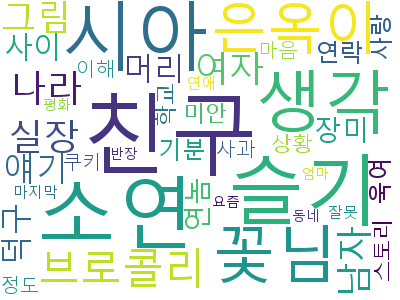

In [349]:
all_words = Flow_word(first, 2, 'preprocessed_best_comment') # 해당하는 단어 리스트 생성

# bow of document
cv = CountVectorizer()
dtm = cv.fit_transform(all_words)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(), # 단어 목록 확인
    '빈도': dtm.sum(axis=0).flat # 단어별 총 빈도
})
count_dic = dict(zip(word_count.단어, word_count.빈도)) # word_count를 사전(dict) 형태로 변환

cloud = wc.fit_words(count_dic)
cloud.to_image()
# cloud.to_file('img/flow/first_web_2.png')

#### 절정

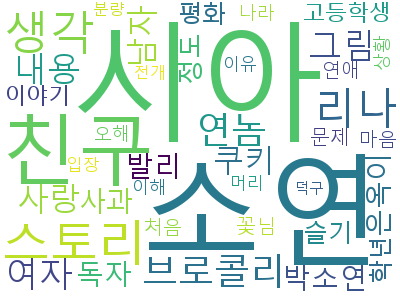

In [351]:
all_words = Flow_word(first, 3, 'preprocessed_best_comment') # 해당하는 단어 리스트 생성

# bow of document
cv = CountVectorizer()
dtm = cv.fit_transform(all_words)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(), # 단어 목록 확인
    '빈도': dtm.sum(axis=0).flat # 단어별 총 빈도
})
count_dic = dict(zip(word_count.단어, word_count.빈도)) # word_count를 사전(dict) 형태로 변환

cloud = wc.fit_words(count_dic)
cloud.to_image()
# cloud.to_file('img/flow/first_web_3.png')

#### 결말

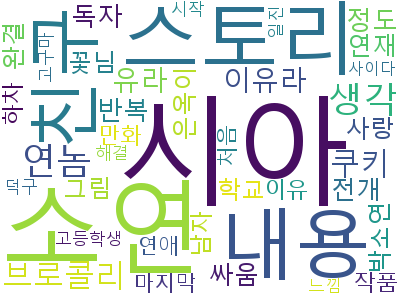

In [353]:
all_words = Flow_word(first, 4, 'preprocessed_best_comment') # 해당하는 단어 리스트 생성

# bow of document
cv = CountVectorizer()
dtm = cv.fit_transform(all_words)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(), # 단어 목록 확인
    '빈도': dtm.sum(axis=0).flat # 단어별 총 빈도
})
count_dic = dict(zip(word_count.단어, word_count.빈도)) # word_count를 사전(dict) 형태로 변환

cloud = wc.fit_words(count_dic)
cloud.to_image()
# cloud.to_file('img/flow/first_web_4.png')

- 임의로 발단-전개-위기-절정-결말을 나눠서 약간 겹치는 부분이 발생하여 단어들이 중복되는 부분이 약간 발생한 것 같음
- 그렇지만 각각 부분마다 단어의 빈도의 차이가 나는 것을 볼 수 있음

## 캐슬

In [407]:
num = 121/5 # 웹툰을 5개의 부분으로 나누기

q1 = num
q2 = q1+num
q3 = q2+num
q4 = q3+num
q5 = q4+num
q1,q2,q3,q4,q5 = [int(q1),'발단'],[int(q2),'전개'],[int(q3),'위기'],[int(q4),'절정'],[int(q5),'결말']

In [408]:
second_df = finish.query('title=="캐슬"').reset_index().iloc[:,2:]
second = pd.DataFrame(columns=['seq','title','preprocessed_best_comment','preprocessed_comment','sentiment'])

start=0
for i,txt in [q1,q2,q3,q4,q5]: # 각 전체 화수의 20%씩 분할하여 배정
    make_df = second_df.iloc[start:i+1,:]
    seq, title, sentiment = txt, '캐슬', statistics.mode(make_df['sentiment']) # 최빈값
    best=''
    com=''
    for j in range(len(make_df)):
        z = make_df['preprocessed_best_comment'].iloc[j]+'\n'
        best += z
        x = make_df['preprocessed_comment'].iloc[j]+'\n'
        com += x
    second.loc[len(second)] = [seq, title, best, com, sentiment]
    start = i+1

In [409]:
wc = WordCloud(
    font_path=font_path, background_color='white',  # 배경색
    max_words=40, width=400, height=300)            # 시각화할 단어 개수, 가로 크기, 세로 크기

#### 발단

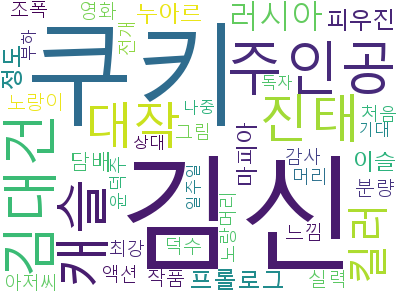

In [362]:
all_words = Flow_word(second, 0, 'preprocessed_best_comment') # 해당하는 단어 리스트 생성

# bow of document
cv = CountVectorizer()
dtm = cv.fit_transform(all_words)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(), # 단어 목록 확인
    '빈도': dtm.sum(axis=0).flat # 단어별 총 빈도
})
count_dic = dict(zip(word_count.단어, word_count.빈도)) # word_count를 사전(dict) 형태로 변환

cloud = wc.fit_words(count_dic)
cloud.to_image()
# cloud.to_file('img/flow/second_web_0.png')

#### 전개

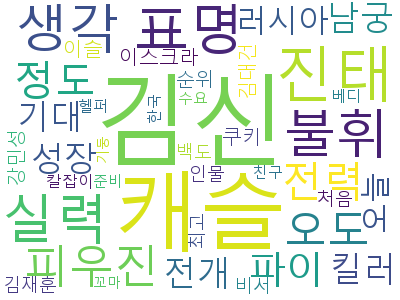

In [364]:
all_words = Flow_word(second, 1, 'preprocessed_best_comment') # 해당하는 단어 리스트 생성

# bow of document
cv = CountVectorizer()
dtm = cv.fit_transform(all_words)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(), # 단어 목록 확인
    '빈도': dtm.sum(axis=0).flat # 단어별 총 빈도
})
count_dic = dict(zip(word_count.단어, word_count.빈도)) # word_count를 사전(dict) 형태로 변환

cloud = wc.fit_words(count_dic)
cloud.to_image()
# cloud.to_file('img/flow/second_web_1.png')

#### 위기

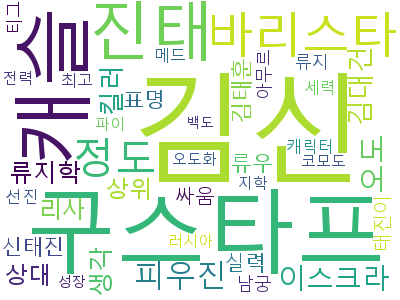

In [366]:
all_words = Flow_word(second, 2, 'preprocessed_best_comment') # 해당하는 단어 리스트 생성

# bow of document
cv = CountVectorizer()
dtm = cv.fit_transform(all_words)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(), # 단어 목록 확인
    '빈도': dtm.sum(axis=0).flat # 단어별 총 빈도
})
count_dic = dict(zip(word_count.단어, word_count.빈도)) # word_count를 사전(dict) 형태로 변환

cloud = wc.fit_words(count_dic)
cloud.to_image()
# cloud.to_file('img/flow/second_web_2.png')

#### 절정

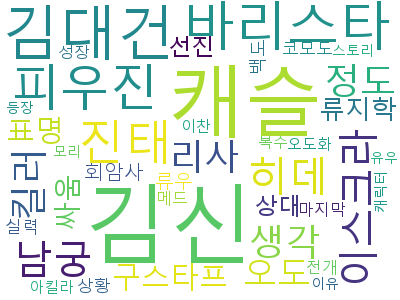

In [368]:
all_words = Flow_word(second, 3, 'preprocessed_best_comment') # 해당하는 단어 리스트 생성

# bow of document
cv = CountVectorizer()
dtm = cv.fit_transform(all_words)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(), # 단어 목록 확인
    '빈도': dtm.sum(axis=0).flat # 단어별 총 빈도
})
count_dic = dict(zip(word_count.단어, word_count.빈도)) # word_count를 사전(dict) 형태로 변환

cloud = wc.fit_words(count_dic)
cloud.to_image()
# cloud.to_file('img/flow/second_web_3.png')

#### 결말

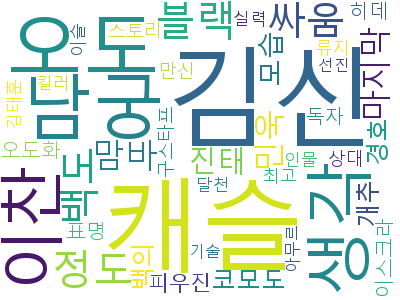

In [410]:
all_words = Flow_word(second, 4, 'preprocessed_best_comment') # 해당하는 단어 리스트 생성

# bow of document
cv = CountVectorizer()
dtm = cv.fit_transform(all_words)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(), # 단어 목록 확인
    '빈도': dtm.sum(axis=0).flat # 단어별 총 빈도
})
count_dic = dict(zip(word_count.단어, word_count.빈도)) # word_count를 사전(dict) 형태로 변환

cloud = wc.fit_words(count_dic)
cloud.to_image()
# cloud.to_file('img/flow/second_web_4.png')

- 임의로 발단-전개-위기-절정-결말을 나눠서 약간 겹치는 부분이 발생하여 단어들이 중복되는 부분이 약간 발생한 것 같음
- 현재 캐슬2가 연재중이어서 5부분으로 나누기에 약간 애매한 부분도 있는거 같음

# best 댓글과 전체 댓글의 차이점

- 완결의 경우, 전체 댓글에서 무의미한 댓글인 경우가 많기 때문에 연재중인 작품 중 선택하여 비교

In [434]:
# 재혼 황후 선택
vs = serialized.query('title == "재혼 황후"')[['title','preprocessed_best_comment','preprocessed_comment','sentiment']]
vs = vs.reset_index().iloc[:,1:]

In [441]:
stopwords = set(list(stopwords)+ ['클린','표현','감지','댓글','작가','웹툰','네이버'])

# bset 댓글 단어 추출
best_words = []
for i in range(len(vs)):
    best_words+=list(Token(vs['preprocessed_best_comment'][i])) # token화한 것들 모으기
best_all_words = []
for word in best_words:
    if (word not in stopwords) & (len(word)>1):  # stopwords에 포함되는 단어 제거
        best_all_words.append(word)
        
# 일반 댓글 단어 추출
com_words = []
for i in range(len(vs)):
    com_words+=list(Token(vs['preprocessed_comment'][i])) # token화한 것들 모으기
com_all_words = []
for word in com_words:
    if (word not in stopwords) & (len(word)>1):  # stopwords에 포함되는 단어 제거
        com_all_words.append(word)

In [456]:
wc = WordCloud(
    font_path=font_path, background_color='white',  # 배경색
    max_words=60, width=400, height=300)            # 시각화할 단어 개수, 가로 크기, 세로 크기

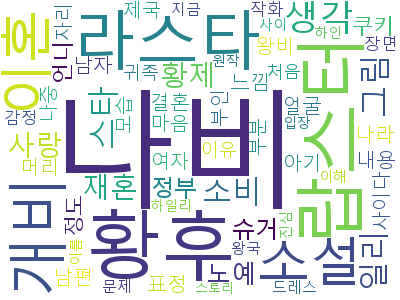

In [458]:
# best bow of document
cv = CountVectorizer()
dtm = cv.fit_transform(best_all_words)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(), # 단어 목록 확인
    '빈도': dtm.sum(axis=0).flat # 단어별 총 빈도
})
count_dic = dict(zip(word_count.단어, word_count.빈도)) # word_count를 사전(dict) 형태로 변환

cloud1 = wc.fit_words(count_dic)
cloud1.to_image()
# cloud1.to_file('img/best_word.png')

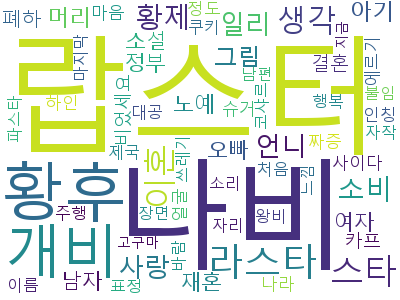

In [460]:
# 전체 댓글 bow of document
cv = CountVectorizer()
dtm = cv.fit_transform(com_all_words)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names_out(), # 단어 목록 확인
    '빈도': dtm.sum(axis=0).flat # 단어별 총 빈도
})
count_dic = dict(zip(word_count.단어, word_count.빈도)) # word_count를 사전(dict) 형태로 변환

cloud2 = wc.fit_words(count_dic)
cloud2.to_image()
# cloud2.to_file('img/com_word.png')

- best 댓글은 장면과 그림에 대한 언급이 상대적으로 더 많았음
- 전체 댓글은 상대적으로 부정적인 단어가 많았음